<a href="https://colab.research.google.com/github/ChesneeMurdock/Predicting-Breast-Cancer-Survival-Rates/blob/main/Machine_Learning_Model_Breast_Cancer_Survivor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Breast Cancer Survival Rates**

In this Breast Cancer dataset, I want to predict whether a tumor is a malignant diagnosis in order to provide insights into survival chances.

I will use **decision tree classifiers**, **random forest classifiers**, and **logisitic regression**  to predict whether a tumor is malignant or benign in order to predict breast cancer survival rates.

In [ ]:
# Import the Breast Cancer dataset
# Binary Classification Prediciton for type of Breast Cancer

# Import packages
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


In [ ]:
# Find the correct filename by listing all files in 'path'

import os
print(os.listdir(path))

['breast-cancer.csv']


In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv(f"{path}/breast-cancer.csv")  # Adjust filename (breast-cancer.csv) if needed

# Drop the ID column since it's not relevant
data = data.drop(columns=['id'])

# Convert diagnosis to binary (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# to see features and target variable
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Check for NA values (any missing values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#Select the X features
X = data.drop(columns=['diagnosis'])  # All numerical features
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Select the y Target (This is the column I want to predict the diagnosis)

y = data['diagnosis']  # Binary target
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


# **Split the dataset into training and test sets**

Why? This is generally the better approach when measuring the model performance on unseen data.

I want to PREDICT survival rates.

Using 'train_test_split(X, y, test_size=0.2, random_state=42)', the dataset is split into:

* 80% (X_train, y_train) for **training** the model.

* 20% (X_test, y_test) for **evaluating** the model.


# **Define a Decision Tree model (DecisionTreeClassifier)**

Why? A Decision Tree Classifier predicts categorical values.

1. After training the model on X-train, use the result to predict outcomes on X_test. The model learns patterns from X_train to classify whether a tumor is malignant (1) or benign (0).

2. Trained (fitted) the model on X_train, y_train. The model learns decision rules to classify new samples.

Why use this? The Decision Tree algorithm learns patterns in the training data and applies them to classify new, unseen tumors.This is helpful because:

1. Identifies key factors in diagnosing breast cancer.

2. Enables automated predictions for new patients.

3. Provides interpretable decision-making (Decision Trees are easy to visualize and understand).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Change from Regressor to Classifier

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model (Use DecisionTreeClassifier for classification)
model = DecisionTreeClassifier(random_state=42)

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 1]


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"This model predicted the breast cancer diagnosis with an Accuracy of: {accuracy*100:.4f}%")

This model predicted the breast cancer diagnosis with an Accuracy of: 94.7368%


# **What does the Accuracy Score mean?**

While 94.74% sounds great, accuracy alone may not be the best metric for evaluating a classification model. If the dataset is imbalanced (e.g., 90% benign, 10% malignant), accuracy can be misleading because the model might just predict "benign" most of the time and still get high accuracy.

In [ ]:
# How many true positives, true negatives, false positives, and false negatives
# the model predicted

from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[68  3]
 [ 3 40]]


# **Confusion Matrix**

This tells you how well your model performed in classifying benign (0) and malignant (1) tumors.

This is how the matrix is constructed:

\[
\begin{array}{c|cc}
    & \text{Predicted Benign (0)} & \text{Predicted Malignant (1)} \\
    \hline
    \text{Actual Benign (0)} & 68 \text{ (True Negatives)} & 3 \text{ (False Positives)} \\
    \text{Actual Malignant (1)} & 3 \text{ (False Negatives)} & 40 \text{ (True Positives)}
\end{array}
\]

**Interpreting the Matrix:**

True Negatives (TN) = 68; model correctly identified 68 benign cases as benign. 🏆

False Positives (FP) = 3; model incorrectly classified 3 benign cases as malignant (false alarm). 🚨  :

False Negatives (FN) = 3; model incorrectly classified 3 malignant cases as benign (missed cancer cases). ❌  

True Positives (TP) = 40; model correctly identified 40 malignant cases as malignant. 🏆


**Model Performance:**

* True Positives (40/43 malignant cases) → The results are high True Positives; the model is good at detecting cancer.

* False Negatives (3 missed cancer cases) → The results are low False Negatives; in medical applications, this is cruical because missing a malignant tumor is dangerous.

* False Positives (3 false alarms) → The results are Few False Positives; some benign cases were misclassified as malignant, leading to unnecessary stress/tests for those patients.

* **Overall, this model performs well.** ⭐

The next steps should focus on reducing False Negatives because missing cancer cases is more serious than false alarms.


In [ ]:
# Classification report: provide precision, recall, and F1-score

from sklearn.metrics import classification_report

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Takeaway:



# **Classification Report**

The Classification Report provides key performance metrics that go beyond accuracy. It gives deeper insights into the model's performance.


* **Precision:** A high precision score mminimizes false positives; it meeasures how many of the predicted positive cases were actually positive.

* **Recall:** (Sensitivity): Measures how well the model finds all actual malignant cases (important for cancer detection); this will help avoid missing potential cancer patients.

* **F1-score:** A high F1 score indicates a good balance between precision and recall; it summarizes overall performance.

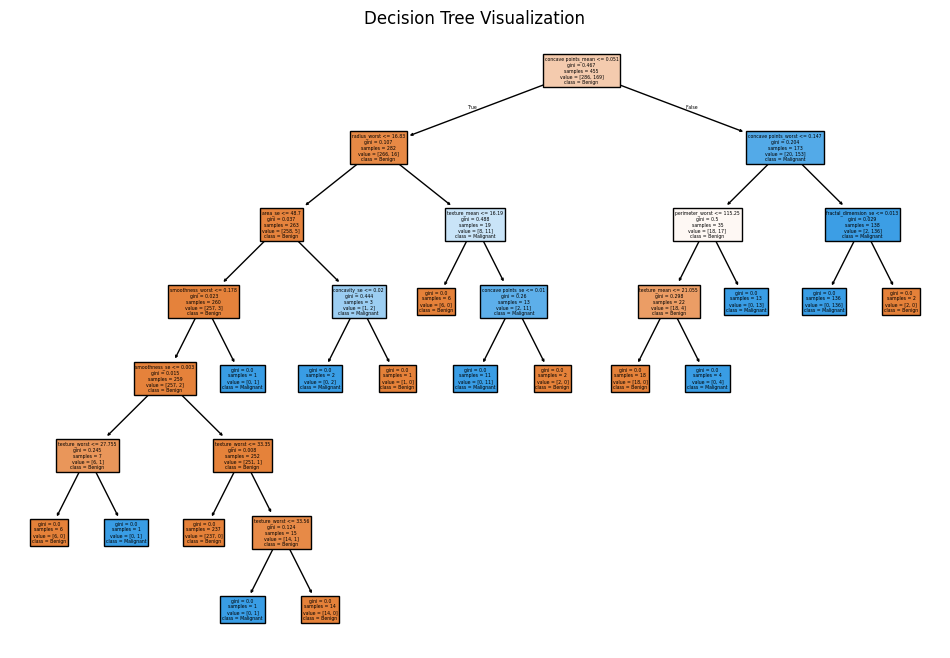

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Benign", "Malignant"])
plt.title("Decision Tree Visualization")
plt.show()




---



# **Random Forest Classifier**

Randon Forest Classifier is a more powerful, ensemble version of Decision Trees.
It reduces overfitting by averaging multiple trees, and handles noisy data better than a single Decision Tree.

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Train Decision Tree Classifier model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)  # Decision tree directly predicts class labels

# Define and train the Randon Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Compare Accuracy
print(f"Decision Tree Classifier Accuracy: {accuracy_dtree*100:.4f}%")
print(f"Random Forest Accuracy: {accuracy_rf*100:.4f}%")

# Compare Confusion Matrices
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nDecision Tree Classifier Confusion Matrix:")
print(conf_matrix_dtree)

print("\nRandom Forest Classifier Confusion Matrix:")
print(conf_matrix_rf)

# Compare Classification Reports
print("\nDecision Tree Classifier Classification Report:")
print(classification_report(y_test, y_pred_dtree))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Decision Tree Classifier Accuracy: 94.7368%
Random Forest Accuracy: 96.4912%

Decision Tree Classifier Confusion Matrix:
[[68  3]
 [ 3 40]]

Random Forest Classifier Confusion Matrix:
[[70  1]
 [ 3 40]]

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Random Forest outperforms Decision Tree Classifier because it combines multiple decision trees to make a more robust and generalized model.

* Since Random Forest trains on multiple samples, it generalizes better to new test data. Random Forest reduces overfitting by averaging multiple trees which produces consistent restuls.
* It generalizes better, leading to higher accuracy.
* It has fewer misclassifications, especially fewer false positives than Decision Tree.
* It is more stable when training on different subsets of data.

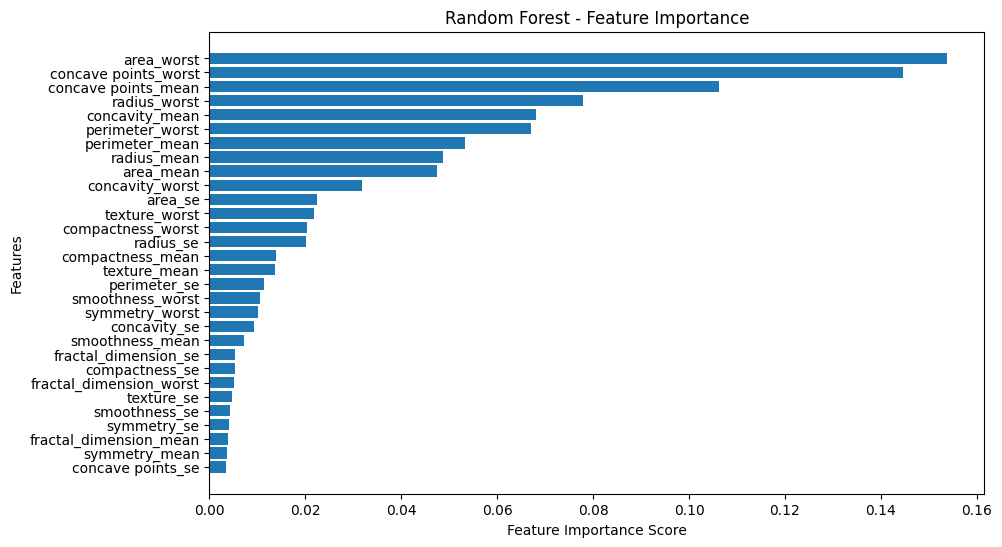

In [ ]:
import numpy as np

# Get feature importances
feature_importance = rf_model.feature_importances_
features = X_train.columns

# Sort feature importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(features)), np.array(features)[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest - Feature Importance")
plt.gca().invert_yaxis()  # Flip the order
plt.show()




---



# **Logistic Regression**

Logisitic Regression is another way to predict whether a tumor is malignant or benign in order to predict breast cancer survival rates.

Logisitic Regression works well with binary classification (0 = benign, 1 = malignant).

It also provides probabilities for predictions. This is useful for confidence in classification.

Logistic Regression sssumes a linear relationship between input features and the outcome.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Get predicted probabilities for class 1 (malignant)
y_probs_logreg = logreg.predict_proba(X_test)[:, 1]

# Set a lower threshold (e.g., 0.4 instead of 0.5)
threshold = 0.4
y_pred_logreg_thres = (y_probs_logreg >= threshold).astype(int)

# Train Decision Tree Classifier model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)  # Decision tree directly predicts class labels

# Compare Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg_thres)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)

print(f"Logistic Regression Accuracy: {accuracy_logreg*100:.4f}%")
print(f"Decision Tree Classifier Accuracy: {accuracy_dtree*100:.4f}%")

# Compare Confusion Matrices
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg_thres)
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)

print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_logreg)

print("\nDecision Tree Classifier Confusion Matrix:")
print(conf_matrix_dtree)

# Compare Classification Reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg_thres))

print("\nDecision Tree Classifier Classification Report:")
print(classification_report(y_test, y_pred_dtree))


Logistic Regression Accuracy: 97.3684%
Decision Tree Classifier Accuracy: 94.7368%

Logistic Regression Confusion Matrix:
[[70  1]
 [ 2 41]]

Decision Tree Classifier Confusion Matrix:
[[68  3]
 [ 3 40]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Comparison between Decision Tree Classifier and Logistic Regression**

Lowering the decision threshold on Logisitic Regression gave an increase in accuracy, an increase in recall, increase in precision, and increase in F1 scores.

1. Accuracy - Logistic Regression saw more than a 2.5% increase in accuracy.

2. Confusion Matrix - Logisitic Regression had higher True Negatives and True Positives; had lower False Negatives and False Positives. Logistic Regression missed 2 cancer cases compared to Decision Tree Classifier missing 3 cancer cases.

3. Classification Report - Logisitic Regression had higher precision, recall and F1 score.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


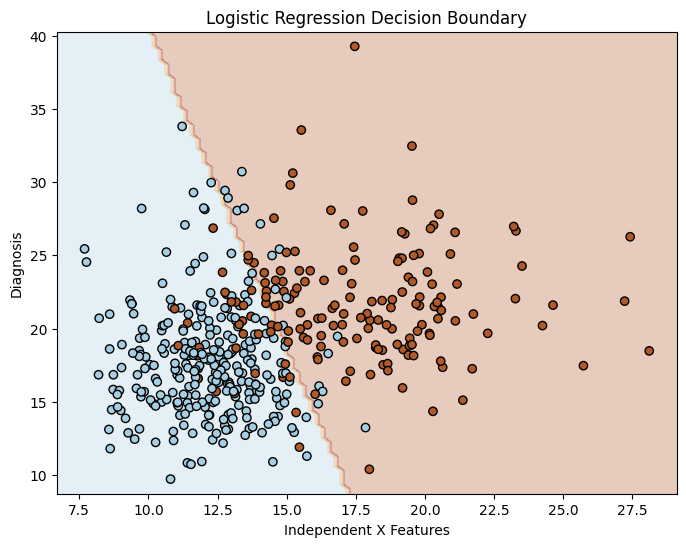

In [ ]:
import numpy as np

# Select two features for visualization
X_vis = X_train.iloc[:, [0, 1]]  # Use first two features for plotting

# Train Logistic Regression on two features
logreg.fit(X_vis, y_train)

# Create mesh grid
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on the grid
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.title("Logistic Regression Decision Boundary")
plt.show()



---



# **Visually compare how each model separates the classes based on the two selected features**

**Explanation:**
* Training Models: The code trains Logistic Regression, Decision Tree, and Random Forest on the first two features (X_vis).

* Mesh Grid: It creates a mesh grid of values between the min and max values of both features, which is used to plot the decision boundaries.

* Predictions: It then uses each model to predict outcomes for each point in the mesh grid and reshapes the result into a format suitable for plotting.

* Plotting: The decision boundaries for each model are plotted side by side in a single figure for easy comparison.

**Visual Output:**

* Logistic Regression: A linear decision boundary.

* Decision Tree: A non-linear decision boundary with clear, rectangular splits.

* Random Forest: A smoother, more generalized decision boundary; more refined than the decision tree.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


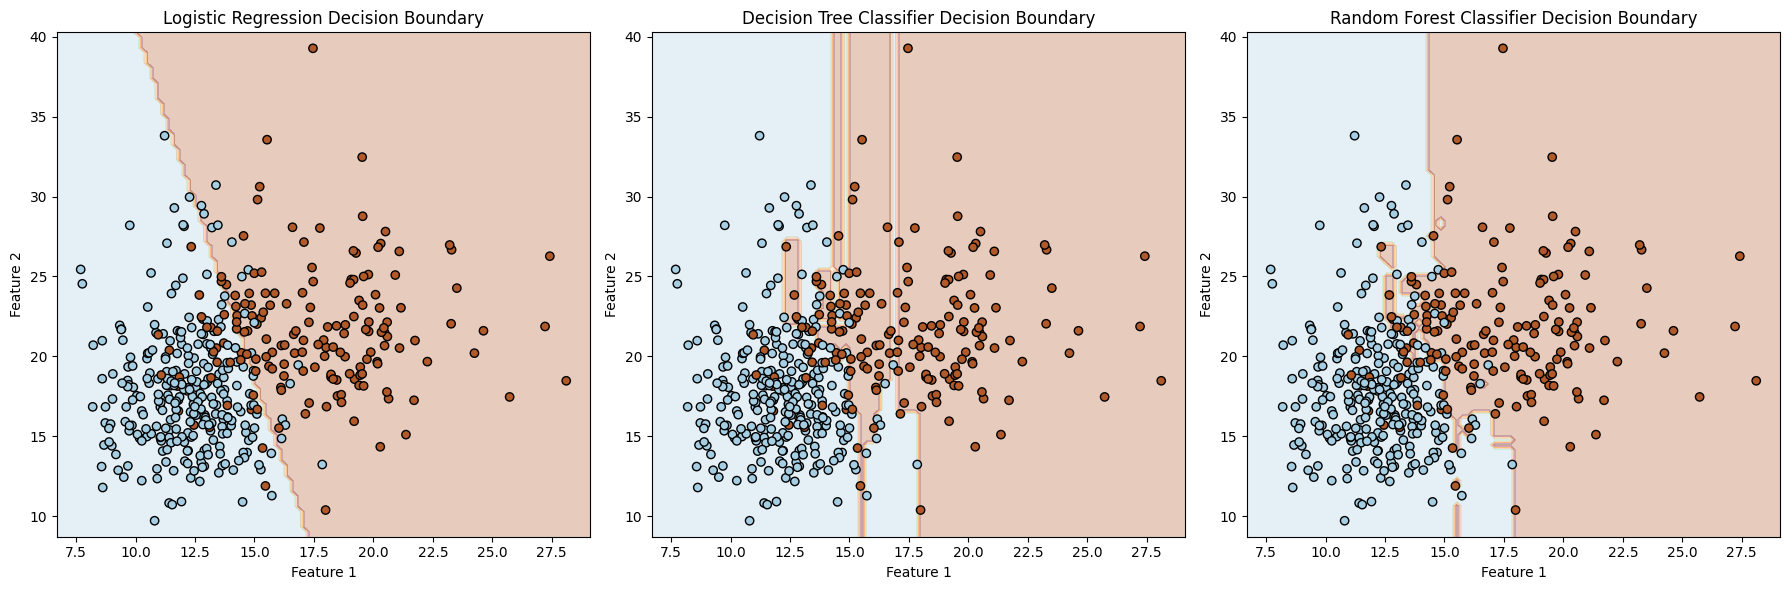

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are already defined (you can use the first two features)
X_vis = X_train.iloc[:, [0, 1]]  # Use first two features for plotting

# Train models
logreg = LogisticRegression(random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

logreg.fit(X_vis, y_train)
dtree.fit(X_vis, y_train)
rf.fit(X_vis, y_train)

# Create mesh grid for plotting decision boundaries
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on the grid
Z_logreg = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = Z_logreg.reshape(xx.shape)

Z_dtree = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
Z_dtree = Z_dtree.reshape(xx.shape)

Z_rf = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)

# Plotting the decision boundaries for each model
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression Plot
ax[0].contourf(xx, yy, Z_logreg, alpha=0.3, cmap=plt.cm.Paired)
ax[0].scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
ax[0].set_title("Logistic Regression Decision Boundary")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# Decision Tree Plot
ax[1].contourf(xx, yy, Z_dtree, alpha=0.3, cmap=plt.cm.Paired)
ax[1].scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
ax[1].set_title("Decision Tree Classifier Decision Boundary")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

# Random Forest Plot
ax[2].contourf(xx, yy, Z_rf, alpha=0.3, cmap=plt.cm.Paired)
ax[2].scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
ax[2].set_title("Random Forest Classifier Decision Boundary")
ax[2].set_xlabel("Feature 1")
ax[2].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()
